Import the necessary modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read the dataset csv into a pandas dataframe

In [ ]:
data = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


explain about the dataset

check the summary statistics 

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


discuss about the max, min, avg, median, and percentiles

Draw a scatter plot between TV and sales

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


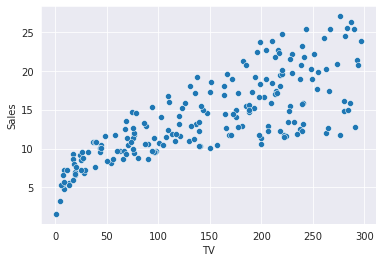

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(data.TV, data.Sales)

what is your insight about this

using pandas method identify the different correlations

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


draw correlation metrix as a heat map

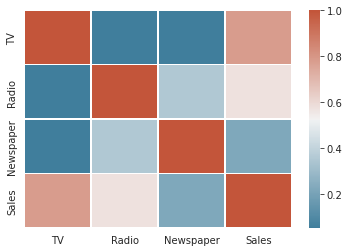

In [ ]:
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(data.corr(),cmap=cmap,vmax=1.0,linewidths=0.4)

Draw a pairplot

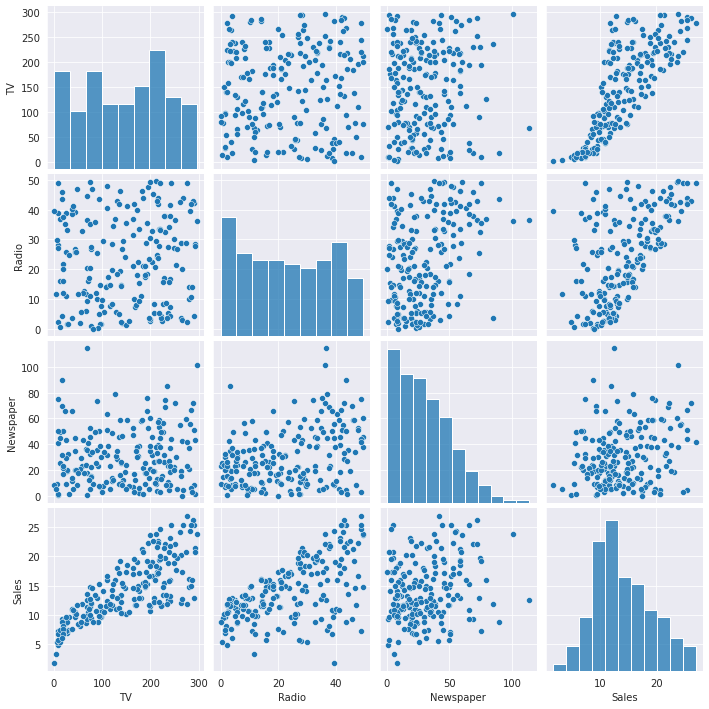

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(data)

store the dependent and independent variables

In [ ]:
X = data.drop('Sales',axis=1)
y = data['Sales']

devide the dataset into traning and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

fit a linear regression on traning data

In [ ]:
#Regression coefficients(Ordinary Least Squares)
sim_reg = LinearRegression()

sim_reg.fit(X_train,y_train)
print(sim_reg.intercept_)
print(sim_reg.coef_)

2.9242267872501237
[ 0.04558897  0.18653389 -0.00063032]


predict it on the test data 

In [ ]:
Sales_pred = sim_reg.predict(X_test)
r2_score(y_test, Sales_pred)

0.9288609285248163

what is the r sqaured value, what is your interpretation about this

what is the mean squared value

In [ ]:
mean_squared_error(y_test,Sales_pred)

2.203012979102849